In [1]:
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft2, fft2, fftshift
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from matplotlib import cm
from matplotlib.ticker import LinearLocator


%matplotlib inline

def opt_plot():
    plt.grid(True, linestyle = ':', color = '0.50')
    plt.rcParams['font.family'] = 'monospace'
    plt.rcParams['font.size'] = 15
    plt.minorticks_on()
    plt.tick_params(axis = 'both', which = 'minor', direction = "in",
                        top = True, right = True, length = 5, width = 1, labelsize = 15)
    plt.tick_params(axis = 'both', which = 'major', direction = "in",
                        top = True, right = True, length = 8, width = 1, labelsize = 15)
    
import warnings
warnings.filterwarnings('ignore')

In [2]:
def NDFT(M, xn):
    
    N = len(xn)
            
    ndft = np.zeros((M, N), complex)
        
    for m in np.arange(M):
        for n in range(N):
            ndft[m, n] = (1./N)*np.exp(-2j*np.pi*m*xn[n])
    
    return ndft

def S2D(x,y):
    
    #s = 0.5*(np.sin(2*np.pi*((3*x+2*y) + (2*x+2*y) )+ np.sin(2*np.pi*(x+y))))
    #s = np.cos(2*np.pi*((3*x+ 2*y) + (2*x + 3*y)))  + np.sin(4*np.pi*(x + y))
    s = 2*np.sin(2*np.pi*(x - y))  + np.sin(4*np.pi*(x + y)) + 0.2*np.sin(6*np.pi*(x + y))
    
    return s

In [3]:
Nx = 128
Ny = 64

tfx = 128
tfy = 64

x = np.linspace(0, tfx, Nx)
y = np.linspace(0, tfy, Ny)
Kx = np.linspace(-(np.pi)/(tfx/Nx),(np.pi)/(tfx/Nx),Nx)
Ky = np.linspace(-(np.pi)/(tfy/Ny),(np.pi)/(tfy/Ny),Ny)

Zam = np.ones((Nx,Ny), int)

X,Y = np.meshgrid(x,y)
Z = S2D(X,Y)

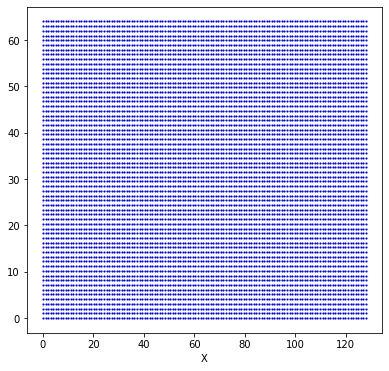

In [4]:
fig = plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
plt.scatter(X,Y, color='blue', s=1.3)
plt.xlabel('X')
plt.savefig('Graderegular.jpg')
plt.show()

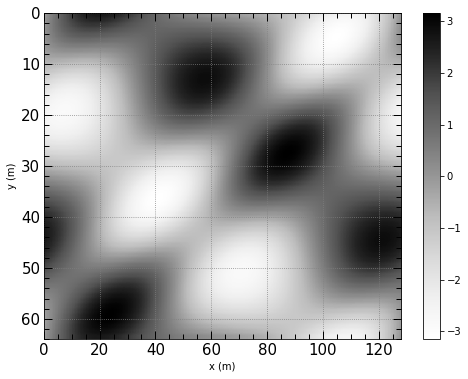

In [5]:
fig = plt.figure(figsize=(8, 6))
plt.imshow(Z, extent=[x[0],x[Nx-1],y[Ny-1],y[0]],
           aspect='auto', origin='upper', cmap='Greys')
plt.colorbar()
plt.ylabel('y (m)')
plt.xlabel('x (m)')
opt_plot()
plt.savefig('sianalharmonicooriginal.jpg')
plt.show()

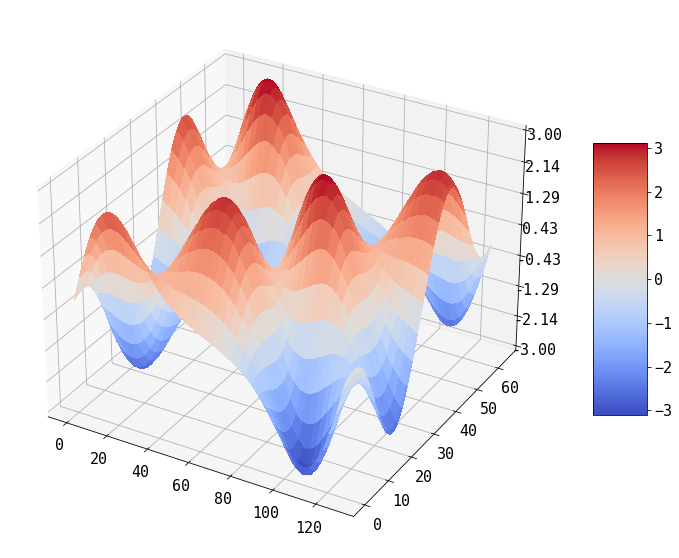

In [6]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-3, 3)

ax.zaxis.set_major_locator(LinearLocator(8))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('sianalharmonicooriginal.jpg')
plt.show()

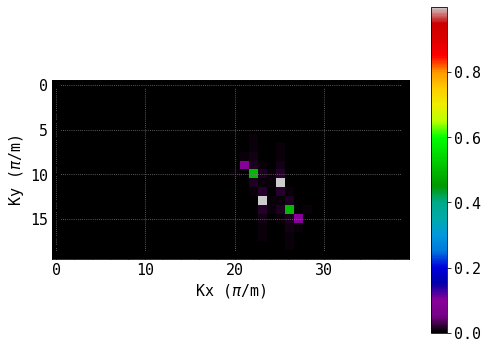

In [7]:
FK = abs(np.fft.fftshift(np.fft.fft2(Z, norm='forward')))

fig = plt.figure(figsize=(8, 6))
plt.imshow(FK[20:40,40:80], cmap='nipy_spectral')
plt.ylabel('Ky ($\pi$/m)')
plt.xlabel('Kx ($\pi$/m)')
opt_plot()
plt.colorbar()
plt.savefig('Espectro2Doriginal.jpg')
plt.show()

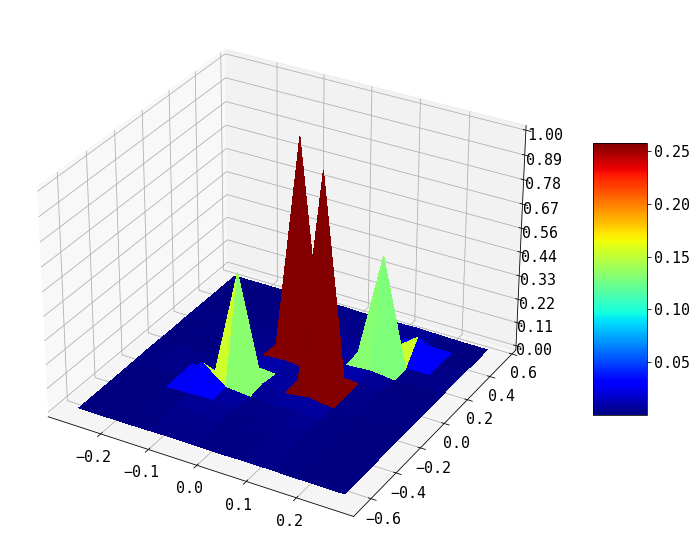

In [8]:
kx, ky = np.meshgrid(Kx[58:70],Ky[25:38])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
# Plot the surface.
surf = ax.plot_surface(kx, ky, FK[25:38,58:70], cmap='jet',
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0., 1.)

ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('Espectro2Doriginal.jpg')
plt.show()

In [9]:
xdec = []
ydec = []
    
ix = random.sample(range(len(x)), 36)
iy = random.sample(range(len(y)), 25)
  
for i in ix:
    xdec.append(x[i])
for i in iy:
    ydec.append(y[i])

xdec = np.sort(np.array(xdec))
ydec = np.sort(np.array(ydec))

In [10]:
Xdec,Ydec = np.meshgrid(xdec,ydec)
Zdec = S2D(Xdec, Ydec)

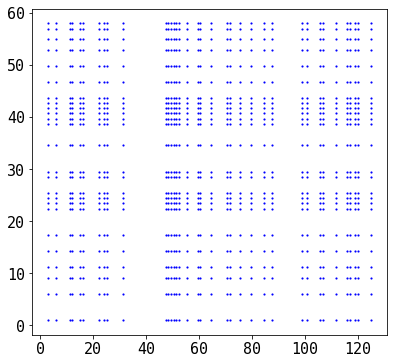

In [11]:
fig = plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
plt.scatter(Xdec,Ydec, color='blue', s=1.3)
plt.savefig('Gradeirregular.jpg')
plt.show()

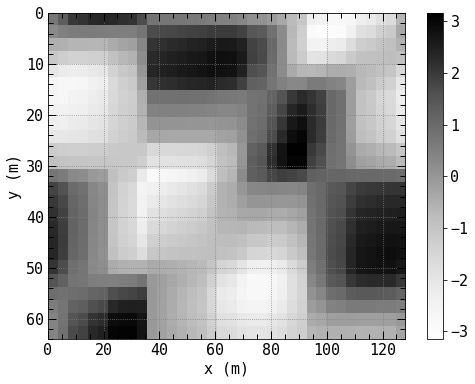

In [12]:
fig = plt.figure(figsize=(8, 6))
plt.imshow(Zdec, vmax=np.max(Z), vmin=np.min(Z), extent=[x[0],x[Nx-1],y[Ny-1],y[0]],
           aspect='auto', origin='upper', cmap='Greys')
plt.colorbar()
plt.ylabel('y (m)')
plt.xlabel('x (m)')
opt_plot()
plt.savefig('Sinal2Ddecimadocap1.jpg')
plt.show()

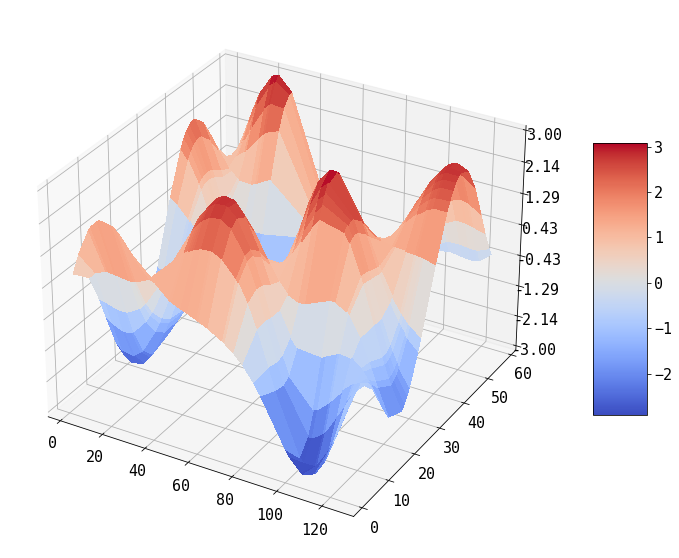

In [13]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
# Plot the surface.
surf = ax.plot_surface(Xdec, Ydec, Zdec, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-3, 3)

ax.zaxis.set_major_locator(LinearLocator(8))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('Sinal2Ddecimadocap1.jpg')
plt.show()

In [14]:
Fx = NDFT(Nx, xdec/tfx)
Fy = NDFT(Ny, ydec/tfy)

In [15]:
print(Fx.shape)
print(Fy.shape)

(128, 36)
(64, 25)


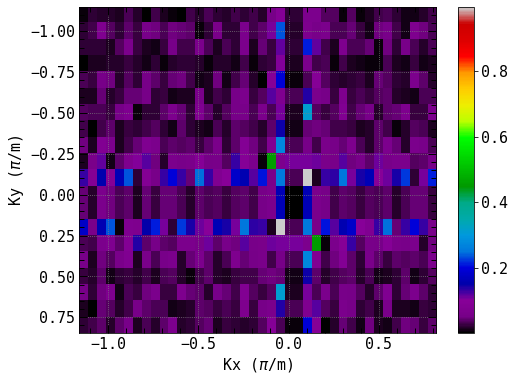

In [16]:
fig = plt.figure(figsize=(8, 6))
plt.imshow(abs(np.fft.fftshift(np.dot(np.dot(Fy, Zdec), Fx.T)))[20:40,40:80], extent=[Kx[40],Kx[80],Ky[40],Ky[20]],
           aspect='auto', origin='upper', cmap='nipy_spectral')
plt.ylabel('Ky ($\pi$/m)')
plt.xlabel('Kx ($\pi$/m)')
opt_plot()
plt.colorbar()
plt.savefig('Espectro2Ddecimado.jpg')
plt.show()

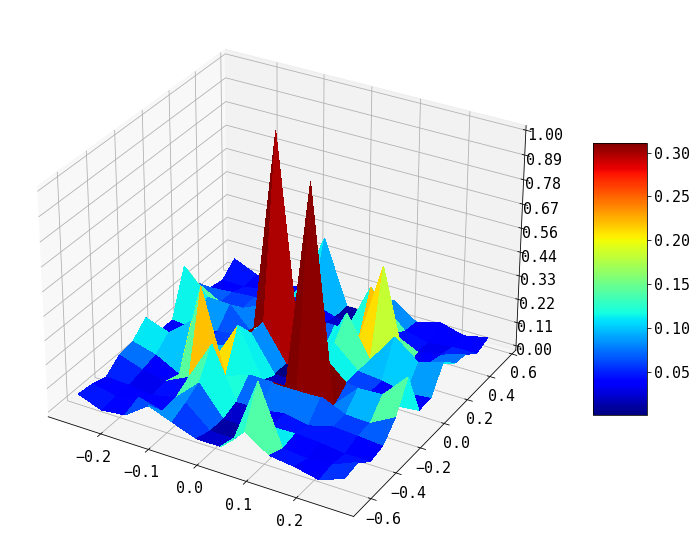

In [17]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
# Plot the surface.
surf = ax.plot_surface(kx, ky,abs(np.fft.fftshift(np.dot(np.dot(Fy, Zdec), Fx.T)))[25:38,58:70], cmap='jet',
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0., 1.)

ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('Espectro2Ddecimado.jpg')
plt.show()

In [18]:
def MPFI(Fy, Fx, y , epsilon):

    r = y
    num_ite = 0
    #indices = np.array([])
    x = np.zeros((Fy.shape[0],Fx.shape[0]), complex)


    while (np.linalg.norm(r , ord=2) >= epsilon):
        
        print(np.linalg.norm(r , ord=2))
        
        absolute_fourier_domain = abs(np.dot(np.dot(Fy, r), Fx.T)) # Indo para o espaço da transformada

        max_freq_fourier_domain = np.max(absolute_fourier_domain) # Pegando a frequência com maior valor absoluto

        indicey = np.where( absolute_fourier_domain == max_freq_fourier_domain )[0][0]
        #print(indicey)
        indicex = np.where( absolute_fourier_domain == max_freq_fourier_domain )[1][0]
        #print(indicex)

        atoms_selected_x = Fx[indicex,:]
        atoms_selected_x = np.reshape(atoms_selected_x, (1, y.shape[1]))
        atoms_selected_y = Fy[indicey,:]
        atoms_selected_y = np.reshape(atoms_selected_y, (1, y.shape[0]))

        coef_max_value = np.dot(np.dot(atoms_selected_y, r), atoms_selected_x.T)
        #coef_max_value.reshape((1,1))

        x[indicey, indicex] = x[indicey, indicex] + coef_max_value # Guardando as frequências
        r = r - (y.shape[0]*y.shape[1])*np.dot(np.dot(np.conjugate(atoms_selected_y).T, coef_max_value), np.conjugate(atoms_selected_x))

        num_ite+=1
    
    return x, num_ite

In [19]:
tol = 0.001
new_espec, num_ite = MPFI(Fy,Fx, Zdec, tol)

33.4379054136051
29.58777053104616
16.366113019741675
14.903586378183975
3.2599519301788953
2.9703255688338173
1.1113165232298776
0.564504919210969
0.21420954862033828
0.12354025022734073
0.04119438356779656
0.011877442330567761
0.01009300811613236
0.0033792646817864553
0.0024925205524089947


In [20]:
print(num_ite)

15


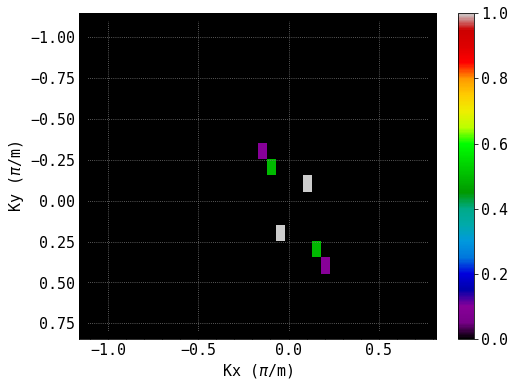

In [21]:
fig = plt.figure(figsize=(8, 6))
plt.imshow(abs(np.fft.fftshift(new_espec))[20:40,40:80], extent=[Kx[40],Kx[80],Ky[40],Ky[20]],
           aspect='auto', origin='upper', cmap='nipy_spectral')
plt.ylabel('Ky ($\pi$/m)')
plt.xlabel('Kx ($\pi$/m)')
opt_plot()
plt.colorbar()
plt.savefig('Espectro2Dreconstruido.jpg')
plt.show()

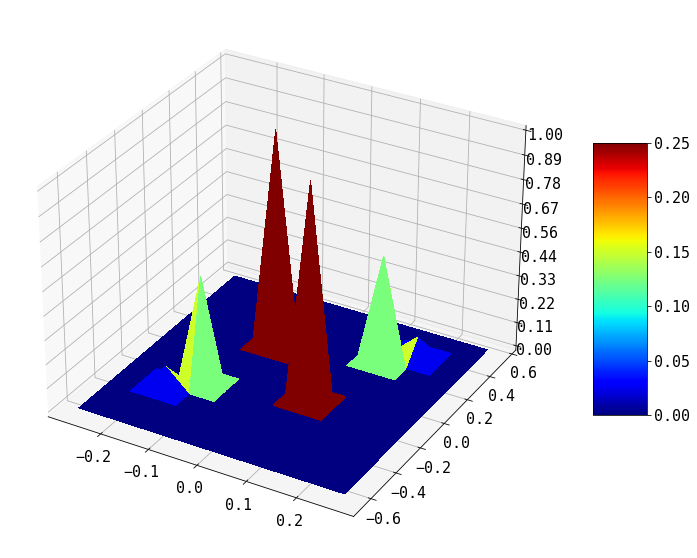

In [22]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
# Plot the surface.
surf = ax.plot_surface(kx, ky, abs(np.fft.fftshift(new_espec))[25:38,58:70], cmap='jet',
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0., 1.)

ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('Espectro2Dreconstruido.jpg')
plt.show()

In [23]:
Fxi = NDFT(Nx, x/tfx)
Fyi = NDFT(Ny, y/tfy)

In [24]:
sinal_rec = (Nx*Ny)*np.dot(np.dot(np.conjugate(Fyi.T),new_espec),np.conjugate(Fxi)).real

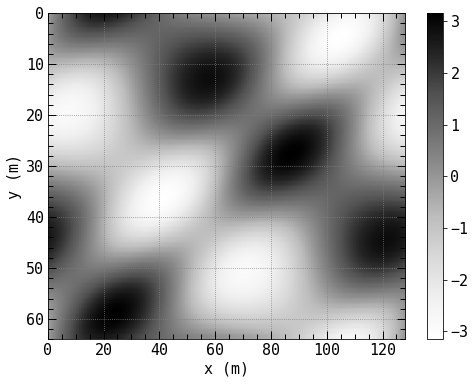

In [25]:
fig = plt.figure(figsize=(8, 6))
plt.imshow(sinal_rec, vmax=np.max(Z), vmin=np.min(Z), extent=[x[0],x[Nx-1],y[Ny-1],y[0]],
           aspect='auto', origin='upper', cmap='Greys')
plt.colorbar()
plt.ylabel('y (m)')
plt.xlabel('x (m)')
opt_plot()
plt.savefig('Sinal2Dreconscap1.jpg')
plt.show()

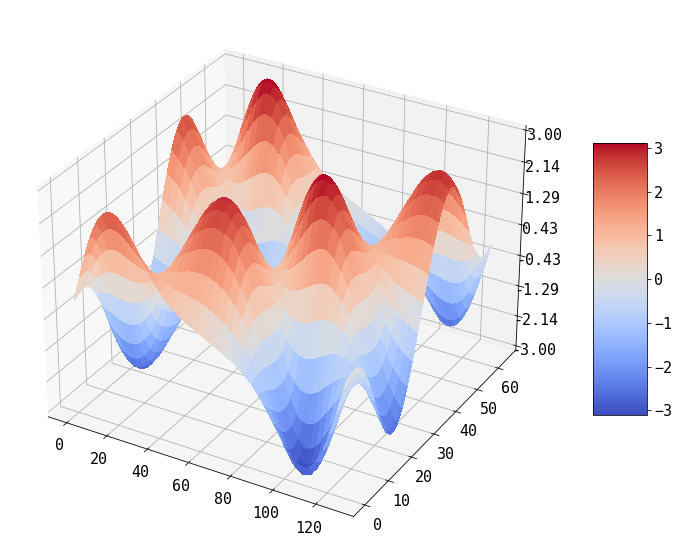

In [26]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
# Plot the surface.
surf = ax.plot_surface(X, Y, sinal_rec, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-3, 3)

ax.zaxis.set_major_locator(LinearLocator(8))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('Sinal2Dreconscap1.jpg')
plt.show()

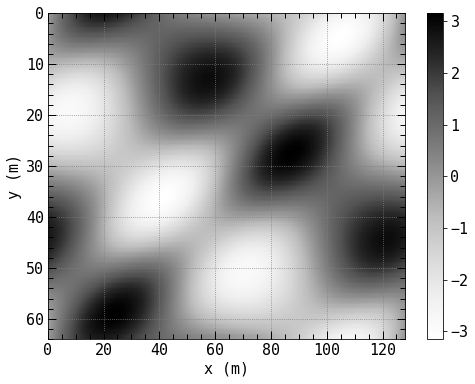

In [27]:
fig = plt.figure(figsize=(8, 6))
plt.imshow(Z, vmax=np.max(Z), vmin=np.min(Z), extent=[x[0],x[Nx-1],y[Ny-1],y[0]],
           aspect='auto', origin='upper', cmap='Greys')
plt.colorbar()
plt.ylabel('y (m)')
plt.xlabel('x (m)')
opt_plot()
plt.show()

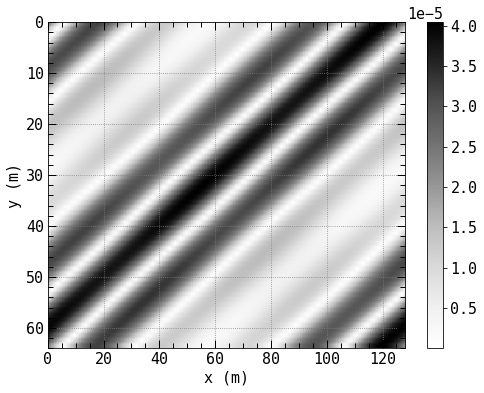

In [28]:
fig = plt.figure(figsize=(8, 6))
plt.imshow(abs(Z - sinal_rec), extent=[x[0],x[Nx-1],y[Ny-1],y[0]],
           aspect='auto', origin='upper', cmap='Greys')
plt.colorbar()
plt.ylabel('y (m)')
plt.xlabel('x (m)')
opt_plot()
plt.savefig('Sinal2Dreconstruído.jpg')
plt.show()

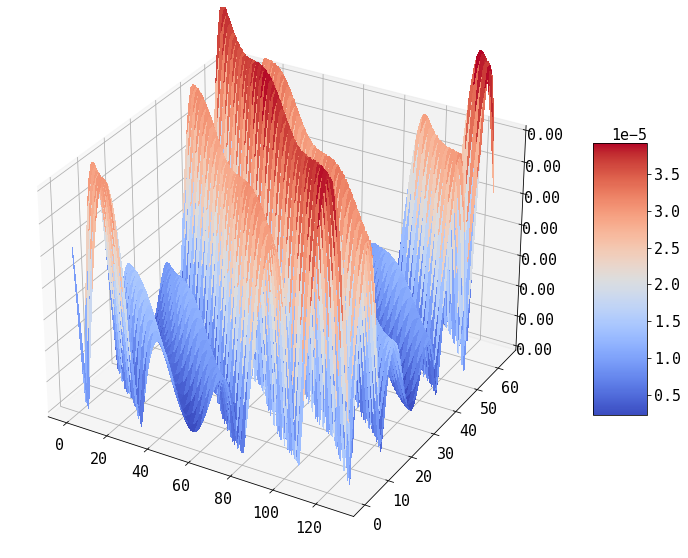

In [29]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
# Plot the surface.
surf = ax.plot_surface(X, Y, abs(Z - sinal_rec), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 3*10**-5)

ax.zaxis.set_major_locator(LinearLocator(8))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('Diferençaabsoluta.jpg')
plt.show()

In [38]:
def RMS(sismograma, sismograma_interpolado):
    rsme = np.linalg.norm(sismograma[:,:] - sismograma_interpolado[:,:], ord=2)/np.linalg.norm(sismograma[:,:], ord=2)
    return rsme

def SNR(sismograma, sismograma_interpolado):
    snr = 10*np.log10(np.linalg.norm(sismograma[:,:], ord=2)/np.linalg.norm((sismograma[:,:] - sismograma_interpolado[:,:]), ord=2))
    return snr

In [39]:
print(RMS(Z, sinal_rec)*100)
print(SNR(Z, sinal_rec))

0.0010662752711055553
49.72130662767786
